In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = True
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'

Computer = "SciClone"   # "SciClone"    "WinLap"  "LinLap"   "Desktop"  "PortLap"

#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)
my_cmap = plt.get_cmap('gray')
PlotWidthIn = 11
PlotHeightIn = 3.75
PlotDPI = 120

In [2]:
import CoreFunctions as cf
import platform
import multiprocessing
from joblib import Parallel, delayed
import os

In [3]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

if Computer == "SciClone":
    location = '/sciclone/home20/dchendrickson01/image/'
elif Computer == "WinLap":
    location = 'C:\\Data\\'
elif Computer == "Desktop":
    location = "E:\\Backups\\Dan\\CraneData\\Laser Data\\"
elif Computer == "LinLap":
    location = '/home/dan/Output/'
elif Computer == 'PortLap':
    location = 'C:\\users\\dhendrickson\\Desktop\\AccelData\\'
    

if Computer ==  "SciClone":
    rootfolder = '/sciclone/home20/dchendrickson01/'
    folder = '/sciclone/scr10/dchendrickson01/New/'
elif Computer == "Desktop":
    rootfolder = location
    folder = rootfolder #+ "SmallCopy\\"
elif Computer =="WinLap":
    rootfolder = location
    folder = rootfolder + "SmallCopy\\"   
elif Computer == "LinLap":
    rootfolder = '/home/dan/Data/'
    folder = rootfolder + 'SmallCopy/'
elif Computer =='PortLap':
    rootfolder = location 
    folder = rootfolder + 'SmallCopy\\'


In [4]:
def getDataFromfiles(file):
    try:
        DS = np.genfromtxt(open(file,'r'), delimiter=',',skip_header=0)
    except:
        print('Fail on file',file)
        DS = file
    return DS

In [5]:
files = os.listdir(folder)
AllData = Parallel(n_jobs=13)(delayed(getDataFromfiles)(folder + file) for file in files)


In [6]:
for i in range(len(files)):
    print(i, files[i],np.shape(AllData[i]))

0 Stack 52 - picking up box and leaving transfer zone.csv (240000, 2)
1 stack 54 - 2nd crane moving slow speed.csv (239979, 2)
2 Stack 54 not moving.csv (240000, 2)
3 Test Stand 3khz at 50khz sampling.csv (599984, 2)
4 Test Stand 60Hz at 200khz sampling.csv (600000, 2)
5 Test Stand 120Hz at 200khz sampling.csv (600000, 2)
6 Test Stand 500 at rest at 200khz sampling.csv (600000, 2)
7 Test Stand 500hz at 50khz sampling - high volume - 0.00 um.csv (599993, 2)
8 Test Stand 500hz at 50khz sampling - high volume.csv (600000, 2)
9 Test Stand 500hz at 50khz sampling.csv (600000, 2)
10 Test Stand 500Hz at 200khz sampling.csv (599997, 2)
11 Test Stand 5000Hz at 200khz sampling.csv (600000, 2)
12 Test Stand 15000Hz at 200khz sampling.csv (600000, 2)


In [7]:
Good = [4,5,6,10,11,12]

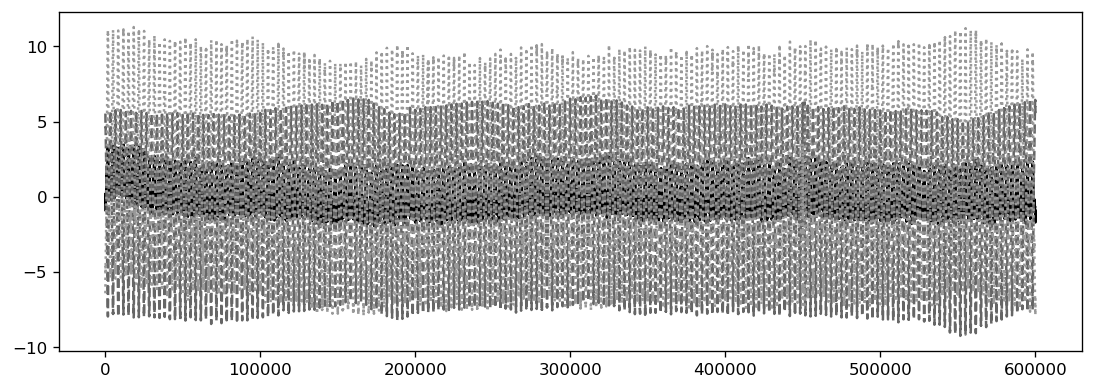

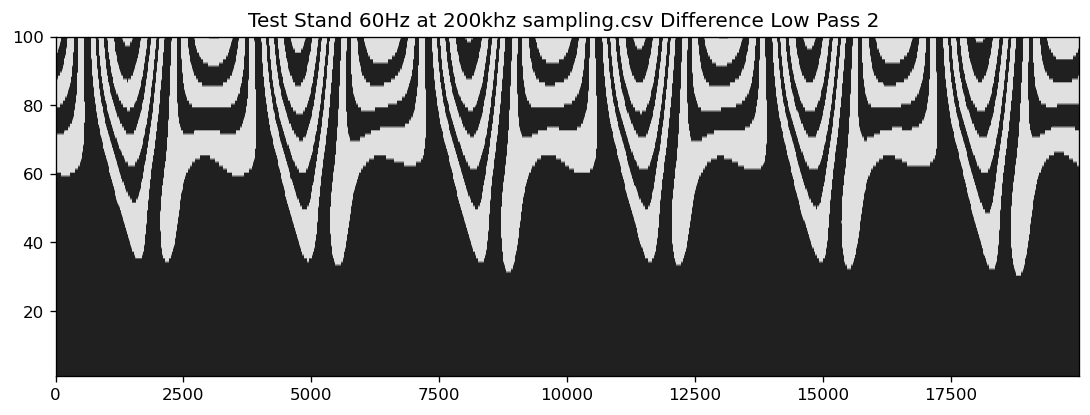

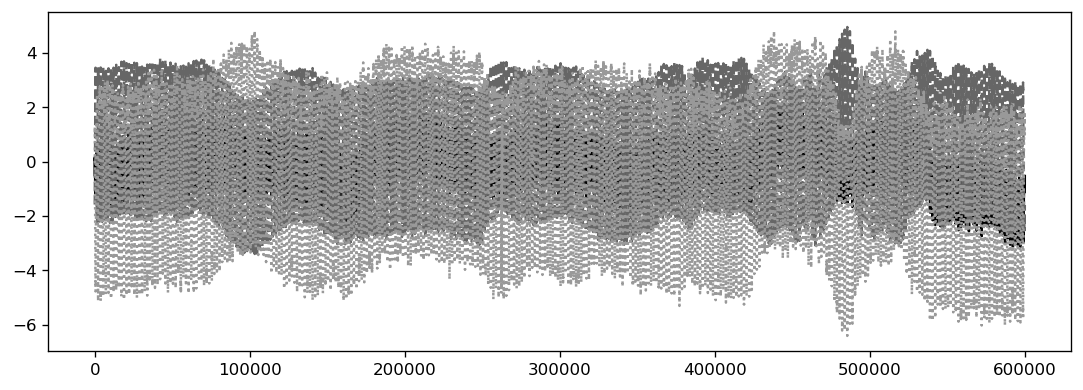

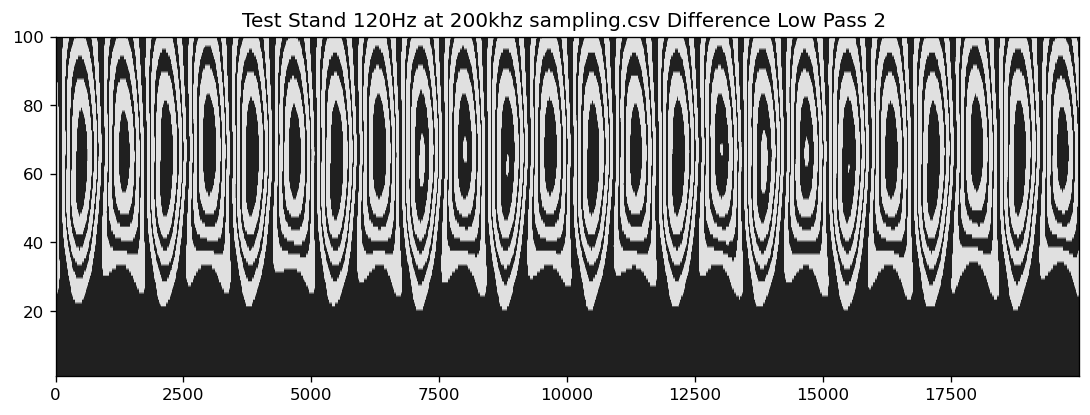

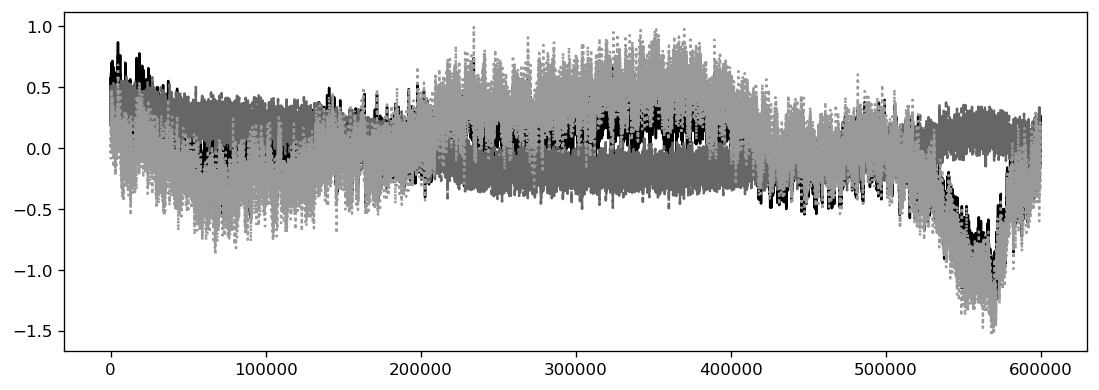

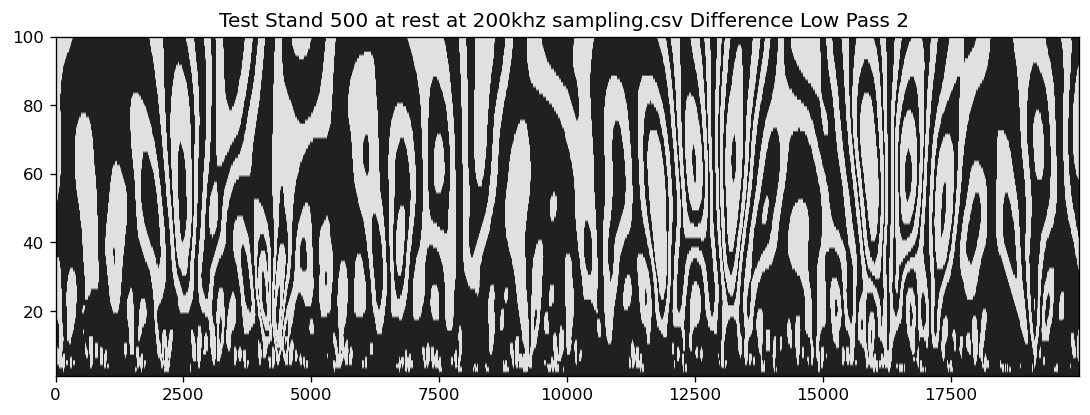

10


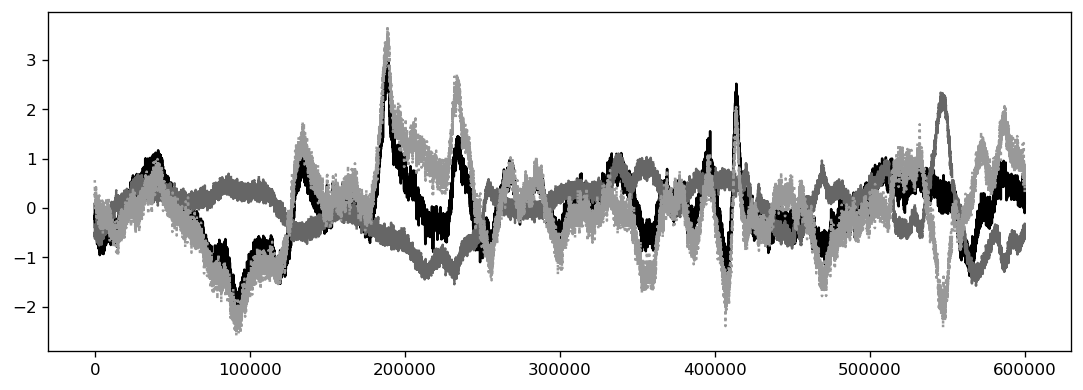

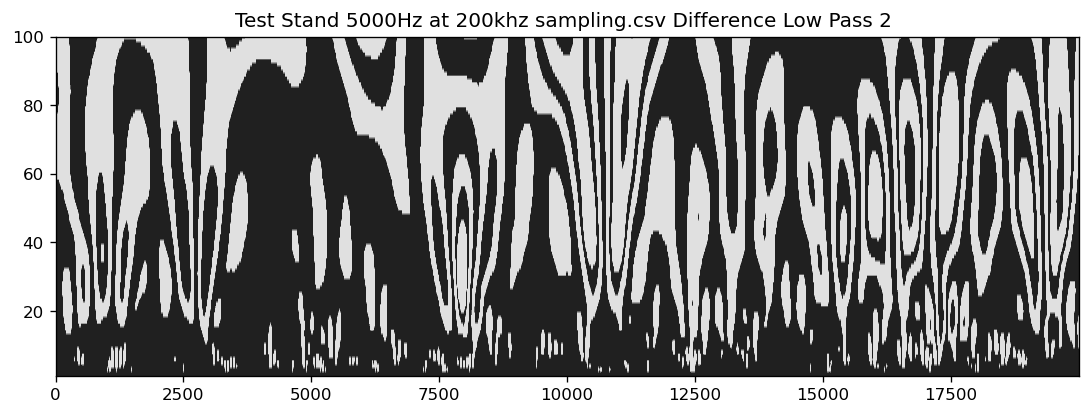

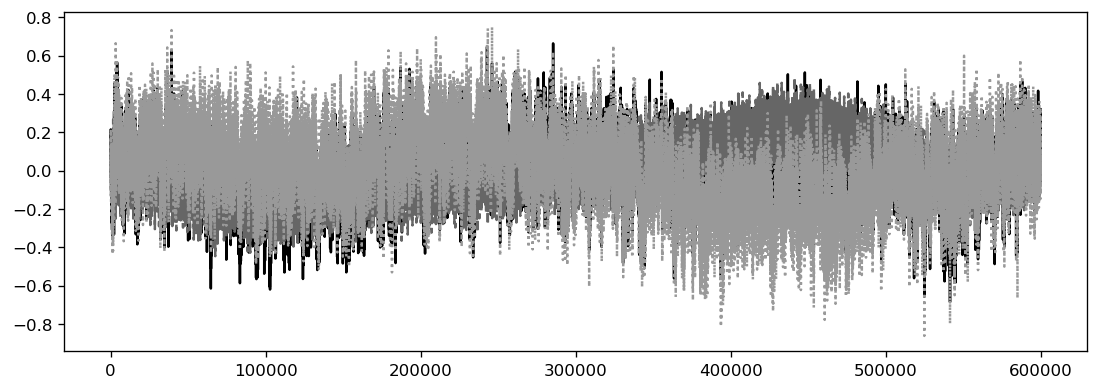

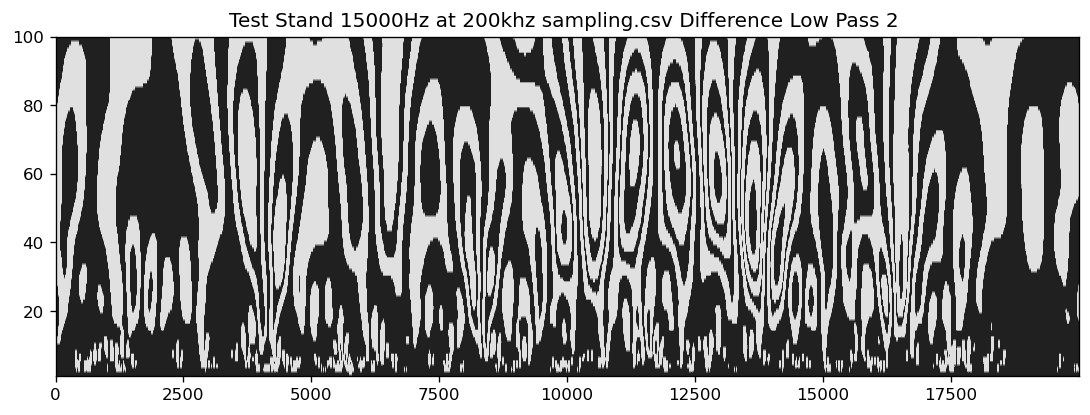

In [21]:
for g in Good:
    try:
        DataSet = AllData[g]
        DifferenceSet = np.matrix(np.subtract(DataSet[:,0],DataSet[:,1])).T
        DataSet = np.concatenate((DataSet, DifferenceSet), axis = 1)
        Head1 = cf.Smoothing(np.array(DataSet[:,0]).flatten(),2)
        Head2 = cf.Smoothing(np.array(DataSet[:,1]).flatten(),2)
        Diff = cf.Smoothing(np.array(DataSet[:,2]).flatten(),2)
        Head1 -= np.average(Head1)
        Head2 -= np.average(Head2)
        Diff -= np.average(Diff)
        fig = plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
        plt.plot(Head1)
        plt.plot(Head2)
        plt.plot(Diff)
        #plt.plot(DataSet[3,:])
        plt.show()
        FullFP2 = cf.getThumbprint2(Diff, 'sym6',100,20)
        hh = cf.PlotFingerPrint([FullFP2[320000:340000].T,files[g]+' Difference Low Pass 2 '])
    except:
        print(g)

In [9]:
np.shape(AllData[2])
DataSet = AllData[11]

In [10]:
DifferenceSet = np.matrix(np.subtract(DataSet[:,0],DataSet[:,1])).T
DataSet = np.concatenate((DataSet, DifferenceSet), axis = 1)

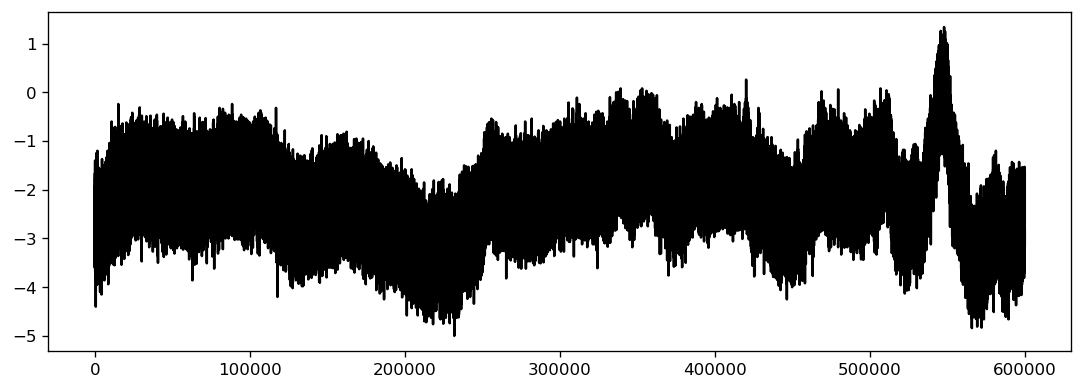

In [11]:
fig = plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
#plt.plot(DataSet[:,0])
plt.plot(DataSet[:,1])
#plt.plot(DataSet[:,2])
#plt.plot(DataSet[3,:])
plt.show()

In [12]:
Head1 = cf.Smoothing(np.array(DataSet[:,0]).flatten(),2)
Head2 = cf.Smoothing(np.array(DataSet[:,1]).flatten(),2)
Diff = cf.Smoothing(np.array(DataSet[:,2]).flatten(),2)

In [13]:
Head1 -= np.average(Head1)
Head2 -= np.average(Head2)
Diff -= np.average(Diff)

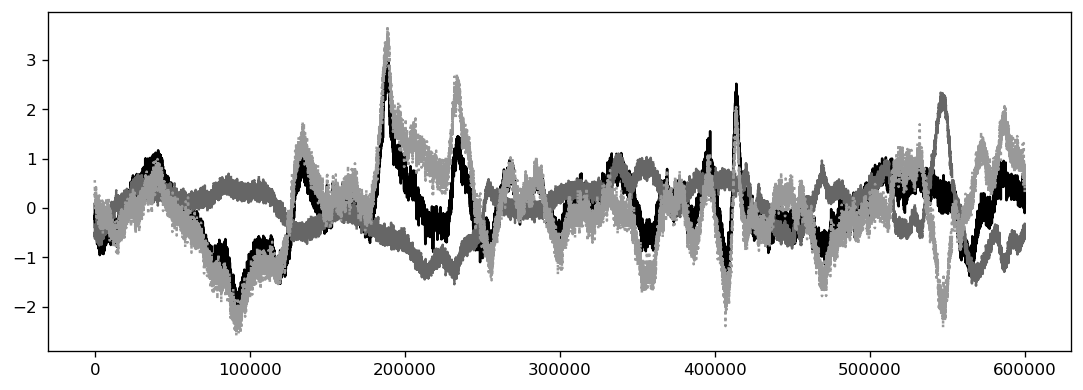

In [14]:
fig = plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
plt.plot(Head1)
plt.plot(Head2)
plt.plot(Diff)
#plt.plot(DataSet[3,:])
plt.show()

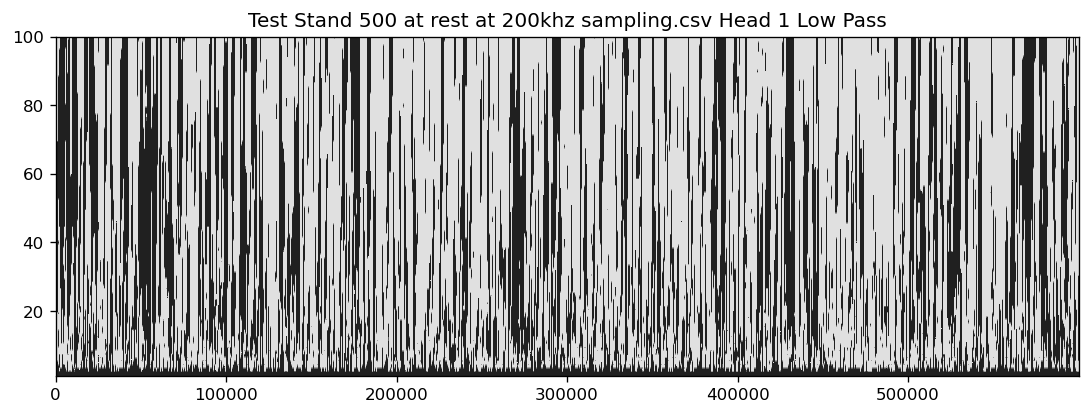

In [15]:
FullFP1 = cf.getThumbprint2(Head1, 'sym5',100,20)
h = cf.PlotFingerPrint([FullFP1.T,files[6]+' Head 1 Low Pass'])

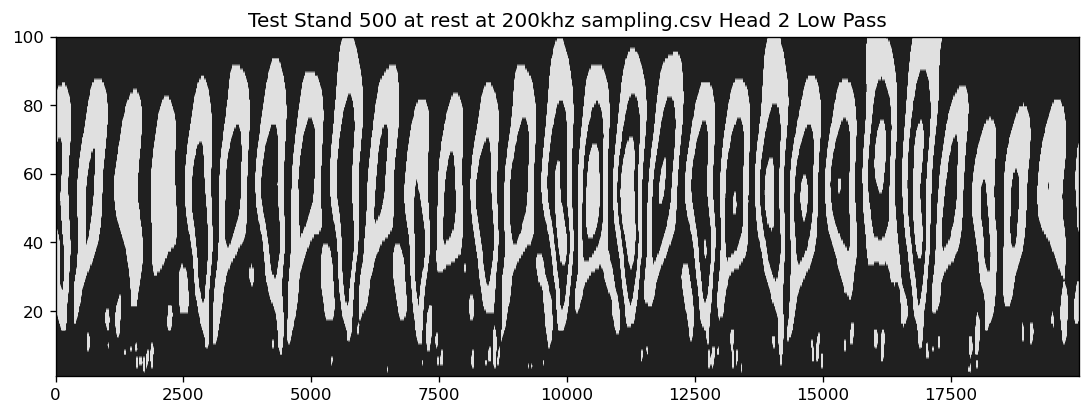

In [16]:
FullFP2 = cf.getThumbprint2(Head2, 'sym5',100,20)
hh = cf.PlotFingerPrint([FullFP2[300000:320000].T,files[6]+' Head 2 Low Pass'])

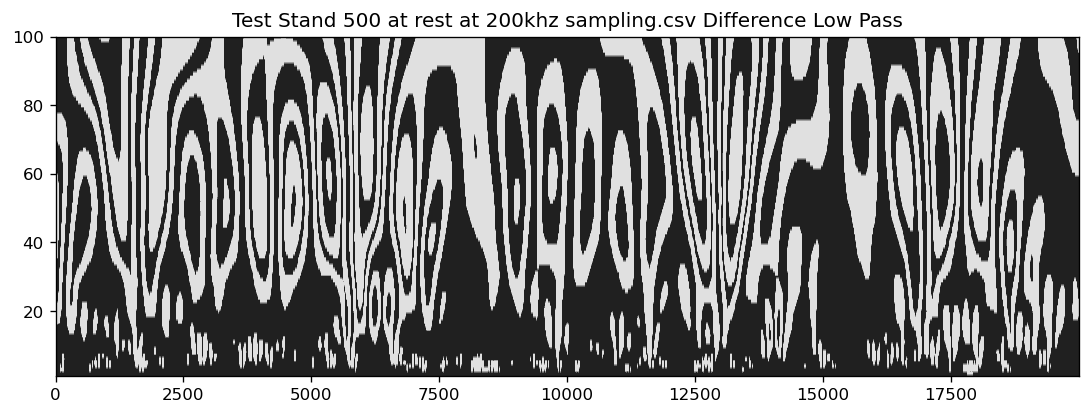

In [17]:
FullFP2 = cf.getThumbprint2(Diff, 'sym6',100,20)
hh = cf.PlotFingerPrint([FullFP2[300000:320000].T,files[6]+' Difference Low Pass'])

In [18]:
FullFP1 = cf.getThumbprint2(np.array(filteredDataSet[:,0].T).flatten(), 'sym6',1000,20)
FullFP2 = cf.getThumbprint2(np.array(filteredDataSet[:,1].T).flatten(), 'sym6',1000,20)
FullFP3 = cf.getThumbprint2(np.array(filteredDataSet[:,2].T).flatten(), 'sym6',1000,20)

NameError: name 'filteredDataSet' is not defined

In [ ]:
h1 = cf.PlotFingerPrint([FullFP1.T,files[6]+' Head 1'])
h2 = cf.PlotFingerPrint([FullFP2.T,files[6]+' Head 2'])
hd = cf.PlotFingerPrint([FullFP3.T,files[6]+' Head Diff'])